# Metody Inteligencji Obliczeniowej w Analizie Danych

[Tasks](https://pages.mini.pw.edu.pl/~karwowskij/mioad/lab-sieci.html)

### Lab 2/3:  Implementacja propagacji wstecznej błędu (2 tygodnie, 4 punkty)

W ramach tego laboratorium trzeba zaimplementować uczenie sieci neuronowej propagacją wsteczną błędu.


Aby sprawdzić implementację, należy wykonać uczenie na prostych danych do uczenia dostarczonych na
zajęciach. Następnie należy zaimplementować metodę wizualizacji wartości wag sieci w kolejnych iteracjach
i, w przypadku gdy nie udaje się nauczyć sieci, spróbować wykorzystać te wizualizacje do ustalenia
przyczyny problemu. Zaimplementować wersję z aktualizacją wag po prezentacji wszystkich wzorców i
wersję z aktualizacją po prezentacji kolejnych porcji (batch). Porównać szybkość uczenia dla każdego z
wariantów.

Inicjować wagi z rozkładu jednostajnego na przedziale [0,1]. Opcjonalnie zaimplementować inną metodą
inicjowania wag. Albo metodę He albo Xavier.

Przetestować uczenie sieci na następujących zbiorach (w nawiasach wartość MSE, aby otrzymać 4 punkty):
- square-simple (jeśli sieć nie jest w stanie się nauczyć tej funkcji to coś jest bardzo źle zrobione, MSE:
4),
- steps-small (MSE: 4),
- multimodal-large (MSE: 40).
(Wartości MSE liczone na nieznormalizowanych danych)

#### TODO:

- ~~change the weights initialization to uniform(0,1), Xavier or He~~
- implemnent cost function for MSE
- ~~implement gradients for activation functions~~
- ~~implement backpropagation without bias~~
- ~~implement backpropagation with bias~~
- implement batch learning
- implement visualization
- implement visualization for batch learning
- compare learning speed with and without batch learning


In [11]:
from MultiLayerPerceptron import NeuralNetwork, Layer
import pandas as pd
import numpy as np

## Dataset 1: Square Simple

In [105]:
df_train = pd.read_csv('data/regression/square-simple-training.csv').set_index("Unnamed: 0")#.sample(frac=1).reset_index(drop=True)
df_test = pd.read_csv('data/regression/square-simple-test.csv').set_index("Unnamed: 0")#.sample(frac=1).reset_index(drop=True)
print(df_test.head())

x_train = [[x] for x in df_train.loc[:,"x"]]
y_train = [[y] for y in df_train.loc[:,"y"]]
x_test = [[x] for x in df_test.loc[:,"x"]]
y_test = [[y] for y in df_test.loc[:,"y"]]

                   x           y
Unnamed: 0                      
1          -0.980437  -43.486918
2          -1.219074    3.752808
3           0.124243 -128.610721
4           1.227789    5.671828
5           1.067348  -27.469169


#### Model 1

In [115]:
net1 = NeuralNetwork(weights_randomizer='normal')
net1.add(Layer(neurons_count=1, add_bias=True))
net1.add(Layer(neurons_count=3, activation_fun="sigmoid", add_bias=True))
net1.add(Layer(neurons_count=1, activation_fun="linear", add_bias=False))

Epoch:    1/1000,   MSE train:10162.663,   MSE test: 8982.368
Epoch:  101/1000,   MSE train: 6445.393,   MSE test: 4836.631
Epoch:  201/1000,   MSE train: 5481.131,   MSE test:  4011.57
Epoch:  301/1000,   MSE train: 4824.404,   MSE test: 3518.237
Epoch:  401/1000,   MSE train: 4333.339,   MSE test: 3167.836
Epoch:  501/1000,   MSE train: 3960.111,   MSE test: 2911.341
Epoch:  601/1000,   MSE train: 3669.701,   MSE test: 2711.906
Epoch:  701/1000,   MSE train: 3437.733,   MSE test: 2552.852
Epoch:  801/1000,   MSE train: 3249.176,   MSE test: 2425.906
Epoch:  901/1000,   MSE train: 3093.413,   MSE test: 2323.457
Epoch: 1000/1000,   MSE train:  2964.72,   MSE test: 2240.525


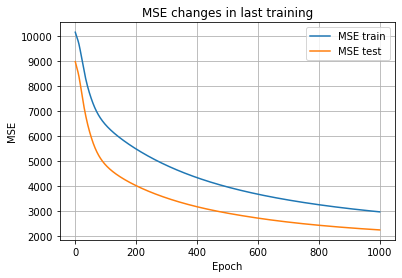

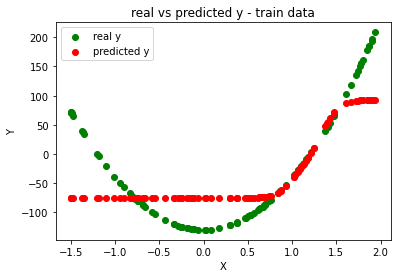

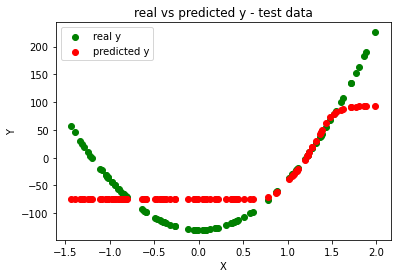

In [116]:
net1.train(x_train, y_train,x_test,y_test, epochs=1000, learning_rate=0.0003, batch_size=3)
net1.plot_training_history()
import matplotlib.pyplot as plt
plt.scatter(x_train, y_train, color="green",label="real y")
plt.scatter(x_train, net1.predict(x_train), color="red",label="predicted y")
plt.legend()
plt.xlabel("X")
plt.ylabel("Y")
plt.title("real vs predicted y - train data")
plt.show()

plt.scatter(x_test, y_test, color="green",label="real y")
plt.scatter(x_test, net1.predict(x_test), color="red",label="predicted y")
plt.legend()
plt.xlabel("X")
plt.ylabel("Y")
plt.title("real vs predicted y - test data")
plt.show()

## Dataset 2: Steps Small

In [38]:
df_train = pd.read_csv('data/regression/steps-small-training.csv').set_index("Unnamed: 0")
df_test = pd.read_csv('data/regression/steps-small-test.csv').set_index("Unnamed: 0")
print(df_train.head())

x_train = [[x] for x in df_train.loc[:,"x"]]
y_train = [[y] for y in df_train.loc[:,"y"]]
x_test = [[x] for x in df_test.loc[:,"x"]]
y_test = [[y] for y in df_test.loc[:,"y"]]

                   x    y
Unnamed: 0               
1           1.786896  160
2           1.189037   80
3          -0.917923  -80
4          -0.518967  -80
5          -0.011570    0


#### Model 1

In [98]:
net2 = NeuralNetwork()
net2.add(Layer(neurons_count=1, add_bias=True))
net2.add(Layer(neurons_count=3, activation_fun='sigmoid', add_bias=True))
net2.add(Layer(neurons_count=3, activation_fun='sigmoid', add_bias=True))
net2.add(Layer(neurons_count=1, activation_fun='linear', add_bias=False))

Epoch:    1/500,   MSE train: 6615.306,   MSE test:  8002.63
Epoch:  101/500,   MSE train:  549.836,   MSE test:  782.948
Epoch:  201/500,   MSE train:  528.092,   MSE test:  679.442
Epoch:  301/500,   MSE train:  461.127,   MSE test:  649.739
Epoch:  401/500,   MSE train:    2.572,   MSE test:   97.652
Epoch:  500/500,   MSE train:    0.749,   MSE test:   92.634


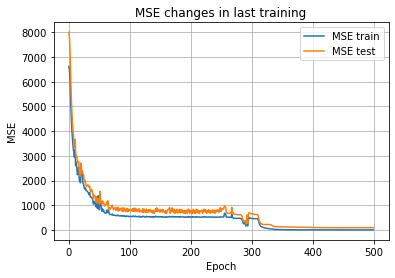

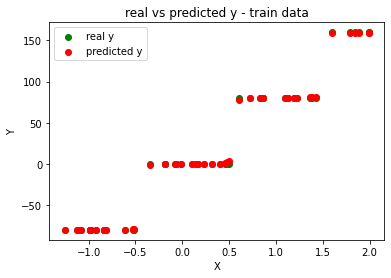

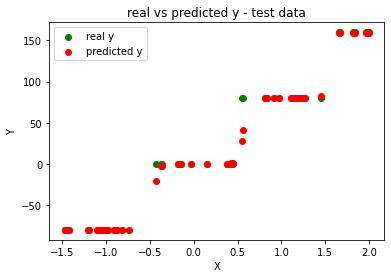

In [99]:
net2.train(x_train, y_train,x_test,y_test, epochs=500, learning_rate=0.003, batch_size=1)
net2.plot_training_history()
import matplotlib.pyplot as plt
plt.scatter(x_train, y_train, color="green",label="real y")
plt.scatter(x_train, net2.predict(x_train), color="red",label="predicted y")
plt.legend()
plt.xlabel("X")
plt.ylabel("Y")
plt.title("real vs predicted y - train data")
plt.show()

plt.scatter(x_test, y_test, color="green",label="real y")
plt.scatter(x_test, net2.predict(x_test), color="red",label="predicted y")
plt.legend()
plt.xlabel("X")
plt.ylabel("Y")
plt.title("real vs predicted y - test data")
plt.show()

## Multimodal Large

In [117]:
df_train = pd.read_csv('data/regression/multimodal-large-test.csv')
df_test = pd.read_csv('data/regression/multimodal-large-training.csv')
print(df_train.head())

x_train = [[x] for x in df_train.loc[:,"x"]]
y_train = [[y] for y in df_train.loc[:,"y"]]
x_test = [[x] for x in df_test.loc[:,"x"]]
y_test = [[y] for y in df_test.loc[:,"y"]]

          x           y
0  0.493292  -98.208166
1 -0.470203  -55.283891
2  1.869983  100.299997
3 -1.040446    2.720629
4 -0.616507  -75.991636


### Model 1

In [129]:
net2 = NeuralNetwork()
net2.add(Layer(neurons_count=1, add_bias=True))
net2.add(Layer(neurons_count=10, activation_fun='sigmoid', add_bias=True))
net2.add(Layer(neurons_count=1, activation_fun='linear', add_bias=False))

Epoch:    1/10,   MSE train:  1920.34,   MSE test: 1801.537
Epoch:   10/10,   MSE train: 1917.831,   MSE test:  1779.89


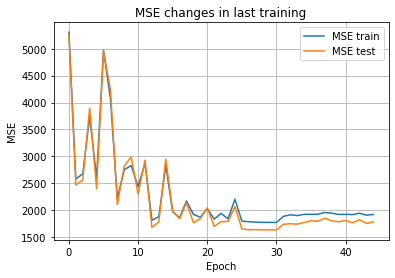

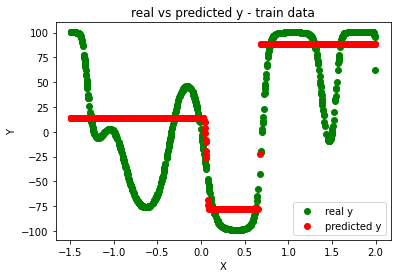

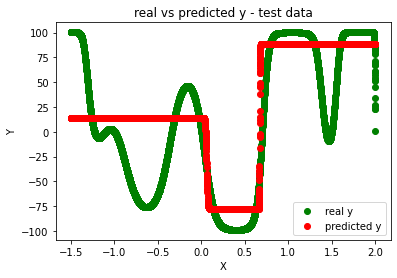

In [137]:
net2.train(x_train, y_train,x_test,y_test, epochs=10, learning_rate=0.03, batch_size=5)
net2.plot_training_history()
import matplotlib.pyplot as plt
plt.scatter(x_train, y_train, color="green",label="real y")
plt.scatter(x_train, net2.predict(x_train), color="red",label="predicted y")
plt.legend()
plt.xlabel("X")
plt.ylabel("Y")
plt.title("real vs predicted y - train data")
plt.show()

plt.scatter(x_test, y_test, color="green",label="real y")
plt.scatter(x_test, net2.predict(x_test), color="red",label="predicted y")
plt.legend()
plt.xlabel("X")
plt.ylabel("Y")
plt.title("real vs predicted y - test data")
plt.show()

#### Results

MSE for the `square simple` dataset is:  
- train: 
- test: 

MSE for the `steps small` dataset is:  
- train: 
- test: 

MSE for the `multimodal large` dataset is:
- train:
- test: